# Installing the Libraries

In [1]:
# pip install tensorflow
# pip install pandas
# pip install wordcloud
# pip install opencv-python
# pip install plotly-express
# pip install Pillow

# Importing the Libraries

In [2]:
import cv2
import numpy as np 
import pandas as pd
import collections
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input

# Importing the Dataset

In [3]:
df_labels = pd.read_csv("data/labels.csv")
train_file = 'data/train/'

In [4]:
print("Total number of unique Dog Breeds :",df_labels['breed'].nunique())

Total number of unique Dog Breeds : 120


In [5]:
df_labels.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

# Formatting Breed Names

In [6]:
cleaned_label_list = []
for breed in df_labels['breed']:
    cleaned_label_list.append(breed.replace("_", " ").title())

# Dog Breed - Word Cloud

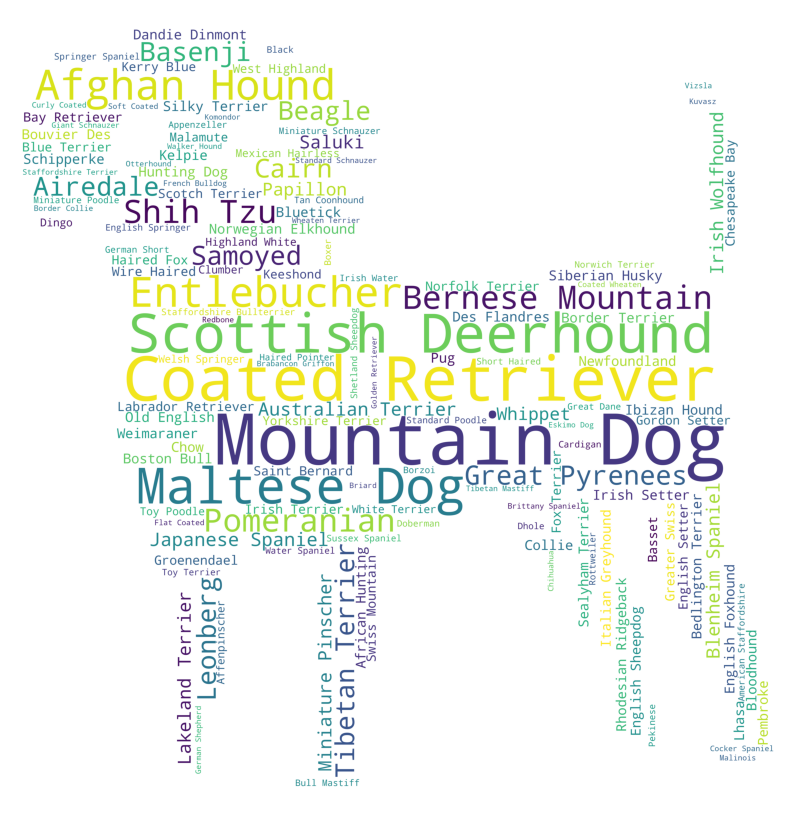

In [7]:
mask = np.array(Image.open('word_cloud.jpg'))

# convert list to string
word_string = ' '.join(cleaned_label_list)

# create a WordCloud object
wordcloud = WordCloud(background_color='white', mask=mask, min_font_size=20, width=mask.shape[1],
               height=mask.shape[0]).generate(word_string)

# plot the WordCloud image
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# show the plot
plt.show()

# Visualization of Dog Breeds

In [8]:
frequency = collections.Counter(cleaned_label_list)
data = {'Breed': list(frequency.keys()), "Count" : list(frequency.values())}  
viz = pd.DataFrame(data)
viz.head()

Breed  Count
0       Boston Bull     87
1             Dingo     80
2          Pekinese     75
3          Bluetick     85
4  Golden Retriever     67

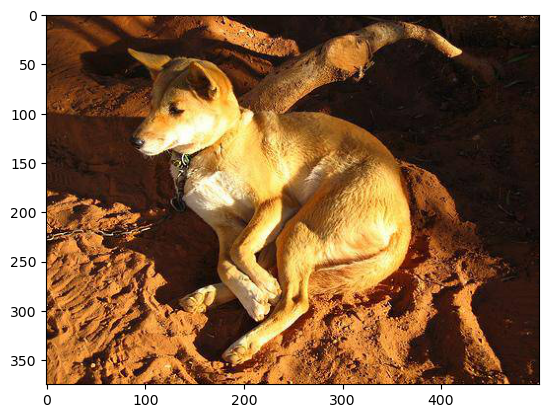

In [9]:
img = Image.open(f"data/train/{df_labels['id'][1]}.jpg")
plt.imshow(img)

In [10]:
fig = px.scatter(viz, x="Breed", y="Count",
                 hover_name="Breed", size="Count")
fig.show()

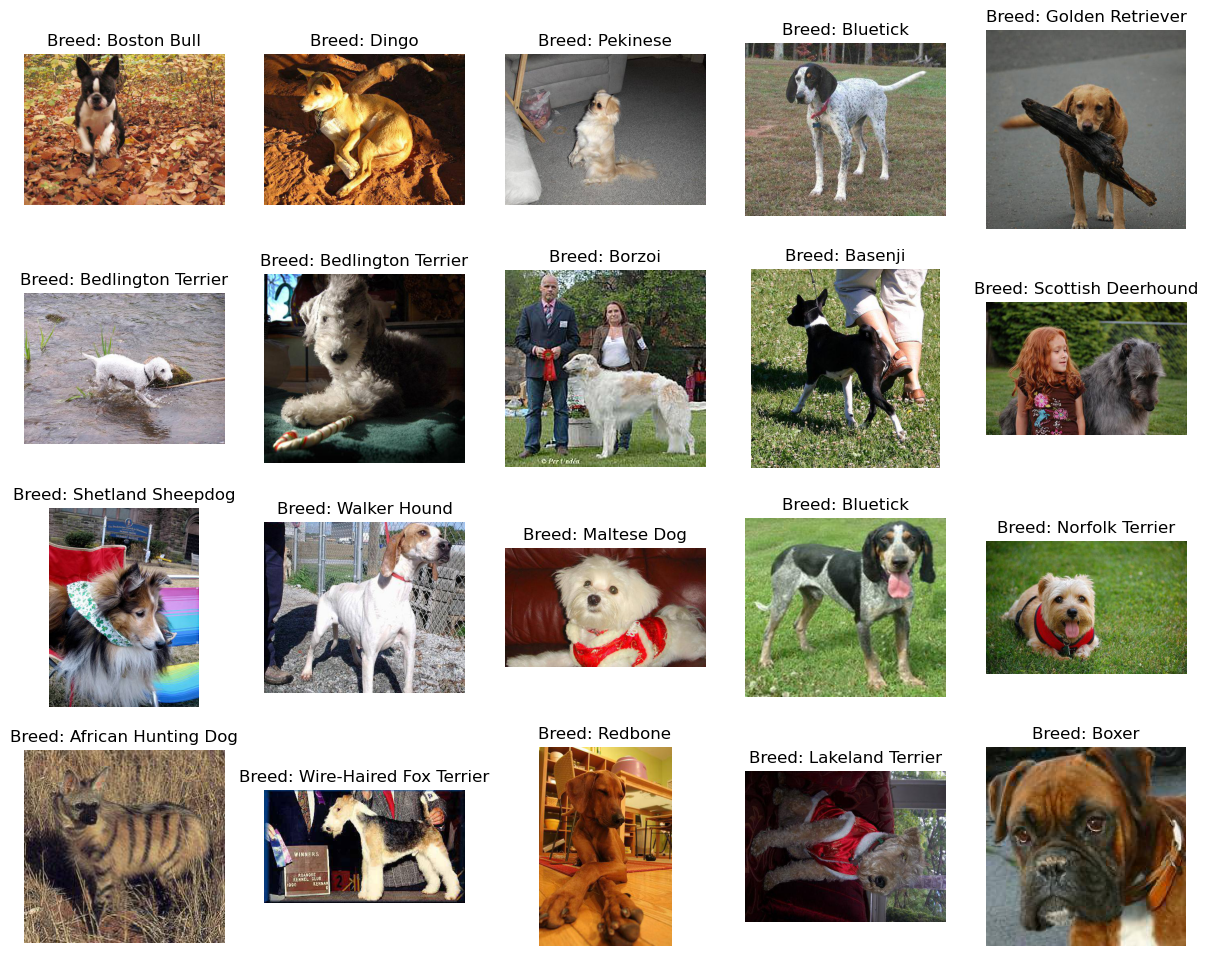

In [11]:
files = df_labels.iloc[0:20]
plt.figure(figsize=(15,15))

for index, name, breed in files.itertuples():
    plt.subplot(5,5, index+1)
    img = load_img(f"data/train/{name}.jpg")
    img = np.array(img)
    plt.imshow(img)
    plt.title("Breed: {}".format(breed.replace("_", " ").title()))
    plt.axis('off')

# Parameter Setting

In [12]:
#specify number
num_breeds = 60
im_size = 224
batch_size = 64
encoder = LabelEncoder()

In [13]:
breed_dict = list(df_labels['breed'].value_counts().keys()) 
new_list = sorted(breed_dict,reverse=True)[:num_breeds*2+1:2]
df_labels = df_labels.query('breed in @new_list')

# Managing Data For Webscrapper

# Connecting Image Path With Extension 

In [14]:
df_labels['img_file'] = df_labels['id'].apply(lambda x: x + ".jpg")
df_labels.head()

id             breed  \
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull   
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo   
2  001cdf01b096e06d78e9e5112d419397          pekinese   
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick   
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever   

                               img_file  
0  000bec180eb18c7604dcecc8fe0dba07.jpg  
1  001513dfcb2ffafc82cccf4d8bbaba97.jpg  
2  001cdf01b096e06d78e9e5112d419397.jpg  
3  00214f311d5d2247d5dfe4fe24b2303d.jpg  
4  0021f9ceb3235effd7fcde7f7538ed62.jpg

In [15]:
df_labels["breed"].unique()

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'basenji', 'scottish_deerhound', 'shetland_sheepdog',
       'walker_hound', 'maltese_dog', 'norfolk_terrier', 'redbone',
       'boxer', 'otterhound', 'labrador_retriever', 'ibizan_hound',
       'border_terrier', 'tibetan_terrier', 'irish_terrier',
       'greater_swiss_mountain_dog', 'schipperke', 'appenzeller',
       'miniature_schnauzer', 'kelpie', 'collie', 'malamute',
       'welsh_springer_spaniel', 'chihuahua', 'saluki', 'komondor',
       'airedale', 'leonberg', 'bull_mastiff', 'bernese_mountain_dog',
       'cardigan', 'clumber', 'afghan_hound', 'miniature_pinscher',
       'eskimo_dog', 'irish_wolfhound', 'toy_terrier', 'norwich_terrier',
       'soft-coated_wheaten_terrier', 'english_foxhound',
       'siberian_husky', 'briard', 'dandie_dinmont', 'beagle', 'whippet',
       'standard_poodle', 'japanese_spaniel', 'pomeranian',
       'yorkshire_terrier', 'great_dane', 'blenheim_spaniel',
    

In [16]:
# # Setting the error up
# import requests
# from bs4 import BeautifulSoup

In [17]:
# def info(breed):
#     url = f"https://www.akc.org/dog-breeds/{breed}"
#     response = requests.get(url)
#     soup = BeautifulSoup(response.content, 'html.parser')

#     paragraphs = soup.find(class_="share-modal__content-inner mt3")
#     return(paragraphs)

In [18]:
# to_edit, other_edit = [],[]
# for i in df_labels['breed'].unique():
#     i = i.replace(' ', '-').replace('_', '-')
#     if info(i) == None:
#         i = i.replace('-', '_')
#         to_edit.append(i)
#     else:
#         other_edit.append(i)

In [19]:
{'boston_bull' : 'boston-terrier',
  'dingo' : 'carolina-dog',
 'pekinese' : 'pekingese',
 'bluetick' : 'bluetick-coonhound',
 'walker_hound' : 'treeing-walker-coonhound',
 'maltese_dog' : 'maltese',
 'redbone' : 'redbone-coonhound',
 'appenzeller' : 'appenzeller-sennenhund',
 'kelpie' : 'australian-kelpie',
 'malamute' : 'alaskan-malamute',
 'airedale' : 'airedale-terrier',
 'leonberg' : 'leonberger',
 'bull_mastiff' : 'bullmastiff',
 'cardigan' : 'cardigan-welsh-corgi',
 'clumber' : 'clumber-spaniel',
 'eskimo_dog' : 'american-eskimo-dog',
 'toy_terrier' : 'toy-fox-terrier',
 'dandie_dinmont' : 'dandie-dinmont-terrier',
 'standard_poodle' : 'poodle-standard',
 'japanese_spaniel' : 'japanese-chin',
 'blenheim_spaniel' : 'cavalier-king-charles-spaniel',
 'german_short_haired_pointer' : 'german-shorthaired-pointer',
 'english_springer' : 'english-springer-spaniel'}

{'boston_bull': 'boston-terrier',
 'dingo': 'carolina-dog',
 'pekinese': 'pekingese',
 'bluetick': 'bluetick-coonhound',
 'walker_hound': 'treeing-walker-coonhound',
 'maltese_dog': 'maltese',
 'redbone': 'redbone-coonhound',
 'appenzeller': 'appenzeller-sennenhund',
 'kelpie': 'australian-kelpie',
 'malamute': 'alaskan-malamute',
 'airedale': 'airedale-terrier',
 'leonberg': 'leonberger',
 'bull_mastiff': 'bullmastiff',
 'cardigan': 'cardigan-welsh-corgi',
 'clumber': 'clumber-spaniel',
 'eskimo_dog': 'american-eskimo-dog',
 'toy_terrier': 'toy-fox-terrier',
 'dandie_dinmont': 'dandie-dinmont-terrier',
 'standard_poodle': 'poodle-standard',
 'japanese_spaniel': 'japanese-chin',
 'blenheim_spaniel': 'cavalier-king-charles-spaniel',
 'german_short_haired_pointer': 'german-shorthaired-pointer',
 'english_springer': 'english-springer-spaniel'}

# Converting Image to Numpy Array

In [20]:
#create a numpy array of the shape
#(number of dataset records, image size , image size, 3 for rgb channel ayer)
#this will be input for model
train_x = np.zeros((len(df_labels), im_size, im_size, 3), dtype='float32')
 
#iterate over img_file column of our dataset
for i, img_id in enumerate(df_labels['img_file']):
  #read the image file and convert into numeric format
  #resize all images to one dimension i.e. 224x224
  #we will get array with the shape of
  # (224,224,3) where 3 is the RGB channels layers
  img = cv2.resize(cv2.imread(train_file+img_id,cv2.IMREAD_COLOR),((im_size,im_size)))
  #scale array into the range of -1 to 1.
  #preprocess the array and expand its dimension on the axis 0 
  img_array = preprocess_input(np.expand_dims(np.array(img[...,::-1].astype(np.float32)).copy(), axis=0))
  #update the train_x variable with new element
  train_x[i] = img_array

# Label Encoding

In [21]:
#This will be the target for the model.
#convert breed names into numerical format
train_y = encoder.fit_transform(df_labels["breed"].values)

# Train-Test Split

In [22]:
#split the dataset in the ratio of 80:20. 
#80% for training and 20% for testing purpose
x_train, x_test, y_train, y_test = train_test_split(train_x,train_y,test_size=0.2,random_state=42)

# Augmentation of Data for Better Performance

In [23]:

#Image augmentation using ImageDataGenerator class
train_datagen = ImageDataGenerator(rotation_range=45,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.25,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
 
#generate images for training sets 
train_generator = train_datagen.flow(x_train, 
                                     y_train, 
                                     batch_size=batch_size)
 
#same process for Testing sets also by declaring the instance
test_datagen = ImageDataGenerator()
 
test_generator = test_datagen.flow(x_test, 
                                     y_test, 
                                     batch_size=batch_size)

# Model Building

In [24]:
#building the model using ResNet50V2 with input shape of our image array
#weights for our network will be from of imagenet dataset
#we will not include the first Dense layer
resnet = ResNet50V2(input_shape = [im_size,im_size,3], weights='imagenet', include_top=False)
#freeze all trainable layers and train only top layers 
for layer in resnet.layers:
    layer.trainable = False
 
# add global average pooling layer and Batch Normalization layer
x = resnet.output
x = BatchNormalization()(x)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
#add fully connected layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)

In [25]:
#add output layer having the shape equal to number of breeds
predictions = Dense(num_breeds, activation='softmax')(x)
 
#create model class with inputs and outputs
model = Model(inputs=resnet.input, outputs=predictions)
#model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 56, 56, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 56, 56, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 conv3_block2_2_conv (Conv2D)   (None, 28, 28, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block1_1_conv (Conv2D)   (None, 14, 14, 256)  131072      ['conv4_block1_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block1_1_relu[0][0]']    
 g2D)     

                                                                                                  
 conv4_block3_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block3_out (Add)         (None, 14, 14, 1024  0           ['conv4_block2_out[0][0]',       
                                )                                 'conv4_block3_3_conv[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block6_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block6_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 7, 7, 256)    589824      ['conv4_block6_2_pad[0][0]']     
          

                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 7, 7, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_out (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_conv[0][0]']    
                                                                                                  
 conv5_block3_preact_bn (BatchN  (None, 7, 7, 2048)  8192        ['conv5_block2_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv5_block3_preact_relu (Acti  (None, 7, 7, 2048)  0           ['conv5_block3_preact_bn[0][0]'] 
 vation)  

In [26]:
#epochs for model training and learning rate for optimizer
epochs = 20
learning_rate = 1e-3
 
#using RMSprop optimizer to compile or build the model
optimizer = RMSprop(learning_rate=learning_rate,rho=0.9)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])
 
#fit the training generator data and train the model
hist = model.fit(train_generator,
                 steps_per_epoch= x_train.shape[0] // batch_size,
                 epochs= epochs,
                 validation_data= test_generator,
                 validation_steps= x_test.shape[0] // batch_size)
 
#Save the model for prediction
model.save("model")
model.save("model.h5")

Epoch 1/20
64/64 [==============================] - 234s 4s/step - loss: 2.2470 - accuracy: 0.4323 - val_loss: 0.7625 - val_accuracy: 0.7695
Epoch 2/20
64/64 [==============================] - 245s 4s/step - loss: 1.2670 - accuracy: 0.6276 - val_loss: 0.6759 - val_accuracy: 0.7910
Epoch 3/20
64/64 [==============================] - 235s 4s/step - loss: 1.1018 - accuracy: 0.6816 - val_loss: 0.6551 - val_accuracy: 0.7969
Epoch 4/20
64/64 [==============================] - 277s 4s/step - loss: 1.0170 - accuracy: 0.6896 - val_loss: 0.6575 - val_accuracy: 0.7871
Epoch 5/20
64/64 [==============================] - 294s 5s/step - loss: 0.9621 - accuracy: 0.7056 - val_loss: 0.6413 - val_accuracy: 0.7979
Epoch 6/20
64/64 [==============================] - 290s 5s/step - loss: 0.9212 - accuracy: 0.7154 - val_loss: 0.6585 - val_accuracy: 0.7979
Epoch 7/20
64/64 [==============================] - 283s 4s/step - loss: 0.8635 - accuracy: 0.7372 - val_loss: 0.6601 - val_accuracy: 0.8008
Epoch 8/20
64

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets
